In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [2]:
from pathlib import Path

from wikipedia_cleanup.data_filter import KeepAttributesDataFilter, generate_default_filters
from wikipedia_cleanup.predict import TrainAndPredictFramework
from wikipedia_cleanup.random_forest import RandomForestPredictor

import pandas as pd
from tqdm import tqdm
from datetime import datetime, timedelta
from sklearn.metrics import f1_score, precision_score
import numpy as np

In [3]:
test_start_date = datetime(2018, 9, 1)
predictor_train_date = test_start_date - timedelta(days=365)

In [4]:
n_files = 5
n_jobs = 6
input_path = Path("../../data/new_costum_filtered_format_with_features/")
predictors = [RandomForestPredictor(use_cache=True, return_probs = True, min_number_changes=200)]

In [11]:
def fit_predictors(predictor_train_date, run_id):
    predictions = []
    for model in predictors:
        framework = TrainAndPredictFramework(model, group_key=['infobox_key', 'property_name'], run_id=run_id, test_start_date = predictor_train_date)
        framework.load_data(input_path, n_files, n_jobs)
        framework.fit_model()
        framework.test_model(generate_summary=False,predict_subset=1)
        predictions.append(framework.run_results['predictions'])
        keys = framework.run_results['keys']
        labels = framework.run_results['labels']
        print("------------------------------------------------")
    return predictions, labels, keys

In [12]:
predictions, labels, keys = fit_predictors(predictor_train_date, run_id="Threshold_tuning_train")

  0%|          | 0/5 [00:00<?, ?it/s]

Start training.
Cache found. Loading from f9bf20b24f9208f012a0.
Finished training. Time elapsed: 0:00:00.090702


  0%|          | 0/24355 [00:00<?, ?it/s]

found a float, converting to float
------------------------------------------------


In [108]:
np.argmax([precision_score(labels_to_use[10], predictions_to_use[10] > thresh, labels=[False,True], zero_division=0)>min_precision for thresh in thresholds_to_try])

0

In [25]:
min_precision=0.85
thresholds_to_try = np.arange(-0.1,1,0.1)
thresholds_to_try[0] = 2
index_to_use = 1 # 0=daily, 1=weekly, 2=mothly, 3=yearly
labels_to_use = labels[index_to_use]
predictions_to_use = predictions[0][index_to_use]
thresholds = []
for i in tqdm(range(len(labels[0]))):
    thresholds.append(thresholds_to_try[np.argmax([precision_score(labels_to_use[i], predictions_to_use[i] > thresh, labels=[False,True], zero_division=0)>min_precision for thresh in thresholds_to_try])])
threshold_lookup = {}
for k,v in zip(keys, thresholds):
    threshold_lookup[k] = v

100%|██████████| 24355/24355 [01:44<00:00, 232.48it/s]


In [122]:
thresholds

[2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 0.1,
 2.0,
 0.0,
 2.0,
 2.0,
 2.0,
 2.0,
 0.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 0.1,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 0.0,
 0.0,
 2.0,
 0.20000000000000004,
 2.0,
 2.0,
 0.20000000000000004,
 0.20000000000000004,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 0.0,
 2.0,
 2.0,
 0.30000000000000004,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 0.1,
 0.0,
 2.0,
 2.0,
 2.0,
 0.1,
 2.0,
 2.0,
 2.0,
 0.30000000000000004,
 0.0,
 0.5000000000000001,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 0.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 0.30000000000000004,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 

In [123]:
threshold_lookup

{('713332864-0', 'league'): 2.0,
 ('713337003-0', 'combatant1'): 2.0,
 ('713337003-0', 'result'): 2.0,
 ('713337003-0', 'territory'): 2.0,
 ('713337003-0', 'units1'): 2.0,
 ('713337660-0', 'date'): 2.0,
 ('713337660-0', 'lastt20idate'): 2.0,
 ('713339275-0', 'first_aired'): 2.0,
 ('713339275-0', 'presenter'): 2.0,
 ('713340693-0', 'nationality'): 2.0,
 ('713346120-0', 'caps1'): 2.0,
 ('713346120-0', 'caps2'): 0.1,
 ('713346120-0', 'caps3'): 2.0,
 ('713346120-0', 'club-update'): 0.0,
 ('713347833-0', 'genre'): 2.0,
 ('713348535-0', 'caps1'): 2.0,
 ('713348535-0', 'caps2'): 2.0,
 ('713348535-0', 'caps3'): 2.0,
 ('713348535-0', 'caps4'): 0.0,
 ('713348535-0', 'clubnumber'): 2.0,
 ('713348535-0', 'currentclub'): 2.0,
 ('713348535-0', 'goals2'): 2.0,
 ('713348535-0', 'goals3'): 2.0,
 ('713348535-0', 'ntupdate'): 2.0,
 ('713348535-0', 'pcupdate'): 0.1,
 ('713348702-0', 'caps2'): 2.0,
 ('713348702-0', 'club-update'): 2.0,
 ('713349896-0', 'caps2'): 2.0,
 ('713349896-0', 'goals2'): 2.0,
 ('713

In [26]:
rf_predictor = RandomForestPredictor(use_cache=True, cluster_classes = True, min_number_changes=200, threshold_dict = threshold_lookup)

In [27]:
framework = TrainAndPredictFramework(rf_predictor, group_key=['infobox_key', 'property_name'],test_start_date=test_start_date)

In [28]:
framework.load_data(input_path, n_files, n_jobs)

  0%|          | 0/5 [00:00<?, ?it/s]

In [29]:
framework.fit_model()

Start training.
Cache found. Loading from f42fb84d9fa1555d5a1e.
Finished training. Time elapsed: 0:00:00.098034


In [30]:
#with threshold tuning and min num changes = 200  and min precision=0.85
print(framework.test_model(randomize=False, predict_subset=1, save_results=False))

  0%|          | 0/24355 [00:00<?, ?it/s]

found a bool, converting to bool
Starting evaluation.
Finished evaluation. Time elapsed: 0:00:03.705019
day 			changes 	no changes 
Precision:		0.1875 		0.9983
Recall:			0.0002 		1.0000
F1score:		0.0004 		0.9991
Changes of Data:	0.174%, 	Total: 15072
Changes of Pred:	0.000%, 	Total: 16

week 			changes 	no changes 
Precision:		0.1000 		0.9891
Recall:			0.0001 		1.0000
F1score:		0.0003 		0.9945
Changes of Data:	1.091%, 	Total: 13546
Changes of Pred:	0.002%, 	Total: 20

month 			changes 	no changes 
Precision:		0.7000 		0.9594
Recall:			0.0006 		1.0000
F1score:		0.0012 		0.9793
Changes of Data:	4.065%, 	Total: 11879
Changes of Pred:	0.003%, 	Total: 10

year 			changes 	no changes 
Precision:		1.0000 		0.6983
Recall:			0.0003 		1.0000
F1score:		0.0005 		0.8223
Changes of Data:	30.179%, 	Total: 7350
Changes of Pred:	0.008%, 	Total: 2


In [115]:
#with threshold tuning and min num changes = 100  and min precision=0.85
print(framework.test_model(randomize=False, predict_subset=1, save_results=False))

  0%|          | 0/22263 [00:00<?, ?it/s]

Starting evaluation.
Finished evaluation. Time elapsed: 0:00:04.233973
day 			changes 	no changes 
Precision:		0.0785 		0.9958
Recall:			0.0042 		0.9998
F1score:		0.0080 		0.9978
Changes of Data:	0.426%, 	Total: 33737
Changes of Pred:	0.023%, 	Total: 1809

week 			changes 	no changes 
Precision:		0.5278 		0.9748
Recall:			0.0066 		0.9998
F1score:		0.0131 		0.9872
Changes of Data:	2.532%, 	Total: 28748
Changes of Pred:	0.032%, 	Total: 360

month 			changes 	no changes 
Precision:		0.7391 		0.9209
Recall:			0.0040 		0.9999
F1score:		0.0080 		0.9587
Changes of Data:	7.943%, 	Total: 21219
Changes of Pred:	0.043%, 	Total: 115

year 			changes 	no changes 
Precision:		1.0000 		0.5641
Recall:			0.0008 		1.0000
F1score:		0.0016 		0.7213
Changes of Data:	43.610%, 	Total: 9709
Changes of Pred:	0.036%, 	Total: 8


In [88]:
#with threshold tuning and min num changes = 100  and  no min precision
print(framework.test_model(randomize=False, predict_subset=1, save_results=False))

  0%|          | 0/22263 [00:00<?, ?it/s]

Starting evaluation.
Finished evaluation. Time elapsed: 0:00:04.232785
day 			changes 	no changes 
Precision:		0.1030 		0.9958
Recall:			0.0082 		0.9997
F1score:		0.0151 		0.9977
Changes of Data:	0.426%, 	Total: 33737
Changes of Pred:	0.034%, 	Total: 2670

week 			changes 	no changes 
Precision:		0.3691 		0.9749
Recall:			0.0073 		0.9997
F1score:		0.0143 		0.9871
Changes of Data:	2.532%, 	Total: 28748
Changes of Pred:	0.050%, 	Total: 569

month 			changes 	no changes 
Precision:		0.5888 		0.9210
Recall:			0.0055 		0.9997
F1score:		0.0108 		0.9587
Changes of Data:	7.943%, 	Total: 21219
Changes of Pred:	0.074%, 	Total: 197

year 			changes 	no changes 
Precision:		0.8421 		0.5642
Recall:			0.0016 		0.9998
F1score:		0.0033 		0.7214
Changes of Data:	43.610%, 	Total: 9709
Changes of Pred:	0.085%, 	Total: 19


In [23]:
#with threshold tuning and min num changes = 200 and no min precision
print(framework.test_model(randomize=False, predict_subset=1, save_results=False))

  0%|          | 0/24355 [00:00<?, ?it/s]

found a bool, converting to bool
Starting evaluation.
Finished evaluation. Time elapsed: 0:00:03.602023
day 			changes 	no changes 
Precision:		0.0236 		0.9983
Recall:			0.0007 		1.0000
F1score:		0.0013 		0.9991
Changes of Data:	0.174%, 	Total: 15072
Changes of Pred:	0.005%, 	Total: 424

week 			changes 	no changes 
Precision:		0.1443 		0.9891
Recall:			0.0010 		0.9999
F1score:		0.0021 		0.9945
Changes of Data:	1.091%, 	Total: 13546
Changes of Pred:	0.008%, 	Total: 97

month 			changes 	no changes 
Precision:		0.5000 		0.9594
Recall:			0.0013 		0.9999
F1score:		0.0027 		0.9793
Changes of Data:	4.065%, 	Total: 11879
Changes of Pred:	0.011%, 	Total: 32

year 			changes 	no changes 
Precision:		1.0000 		0.6983
Recall:			0.0005 		1.0000
F1score:		0.0011 		0.8224
Changes of Data:	30.179%, 	Total: 7350
Changes of Pred:	0.016%, 	Total: 4


In [70]:
#without threshold tuning and min num changes = 200  and  global thresh = 0.6
print(framework.test_model(randomize=False, predict_subset=1, save_results=False))

  0%|          | 0/22263 [00:00<?, ?it/s]

Starting evaluation.
Finished evaluation. Time elapsed: 0:00:04.246294
day 			changes 	no changes 
Precision:		0.9226 		0.9958
Recall:			0.0042 		1.0000
F1score:		0.0084 		0.9979
Changes of Data:	0.426%, 	Total: 33737
Changes of Pred:	0.002%, 	Total: 155

week 			changes 	no changes 
Precision:		0.9595 		0.9747
Recall:			0.0025 		1.0000
F1score:		0.0049 		0.9872
Changes of Data:	2.532%, 	Total: 28748
Changes of Pred:	0.007%, 	Total: 74

month 			changes 	no changes 
Precision:		0.7931 		0.9207
Recall:			0.0011 		1.0000
F1score:		0.0022 		0.9587
Changes of Data:	7.943%, 	Total: 21219
Changes of Pred:	0.011%, 	Total: 29

year 			changes 	no changes 
Precision:		1.0000 		0.5639
Recall:			0.0002 		1.0000
F1score:		0.0004 		0.7212
Changes of Data:	43.610%, 	Total: 9709
Changes of Pred:	0.009%, 	Total: 2


In [65]:
#with threshold tuning and min num changes = 0  and min precision = 0.85
print(framework.test_model(randomize=False, predict_subset=1, save_results=False))

  0%|          | 0/22263 [00:00<?, ?it/s]

Starting evaluation.
Finished evaluation. Time elapsed: 0:00:04.286544
day 			changes 	no changes 
Precision:		0.0099 		0.9959
Recall:			0.0689 		0.9704
F1score:		0.0173 		0.9830
Changes of Data:	0.426%, 	Total: 33737
Changes of Pred:	2.972%, 	Total: 235574

week 			changes 	no changes 
Precision:		0.0725 		0.9763
Recall:			0.0930 		0.9691
F1score:		0.0815 		0.9727
Changes of Data:	2.532%, 	Total: 28748
Changes of Pred:	3.246%, 	Total: 36855

month 			changes 	no changes 
Precision:		0.2028 		0.9253
Recall:			0.0949 		0.9678
F1score:		0.1293 		0.9461
Changes of Data:	7.943%, 	Total: 21219
Changes of Pred:	3.716%, 	Total: 9928

year 			changes 	no changes 
Precision:		0.7055 		0.5780
Recall:			0.0804 		0.9740
F1score:		0.1444 		0.7255
Changes of Data:	43.610%, 	Total: 9709
Changes of Pred:	4.972%, 	Total: 1107


Starting generating plots.
evaluate_static_dynamic failed.
Finished evaluation. Time elapsed: 0:00:06.050790


<Figure size 432x288 with 0 Axes>

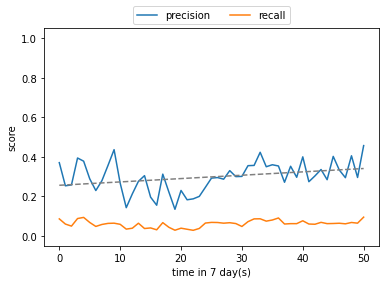

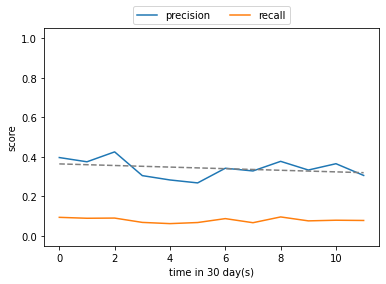

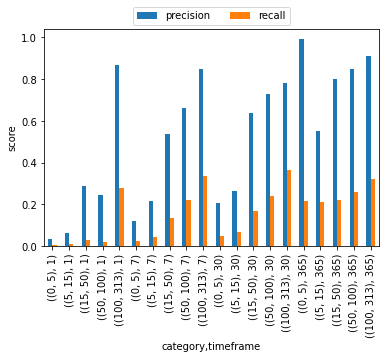

<Figure size 720x360 with 0 Axes>

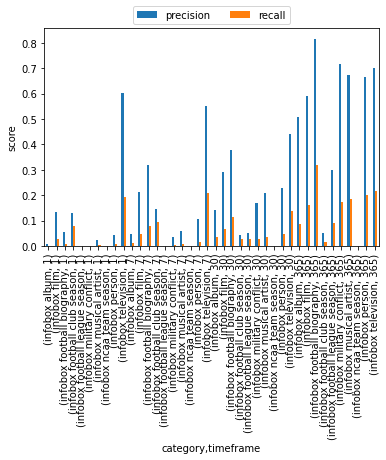

In [48]:
framework.generate_plots()